In [13]:
import os
import shutil
import csv
from collections import defaultdict
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
# Download the audio sets from https://zenodo.org/records/1290750#.WzCwSRyxXMU
# Please create a folder called /data and put all the extracted folders inside

def load_testset(dest):
    src = os.path.abspath('./data/IRMAS-TrainingData')

    file_dest = os.path.abspath(dest)

    print("Processing Traning Data")
    print(src)
    for root, _, files in os.walk(src):
        for file in files:
            if file[-4:] != '.wav':
                continue
            file_src = os.path.join(root, file)
            shutil.move(file_src, file_dest)

    print("Finished Moving Training Data")


load_testset('./TrainingData')

Processing Traning Data
f:\MiiD\data\IRMAS-TrainingData
Finished Moving Training Data


<Axes: xlabel='Count', ylabel='Musical'>

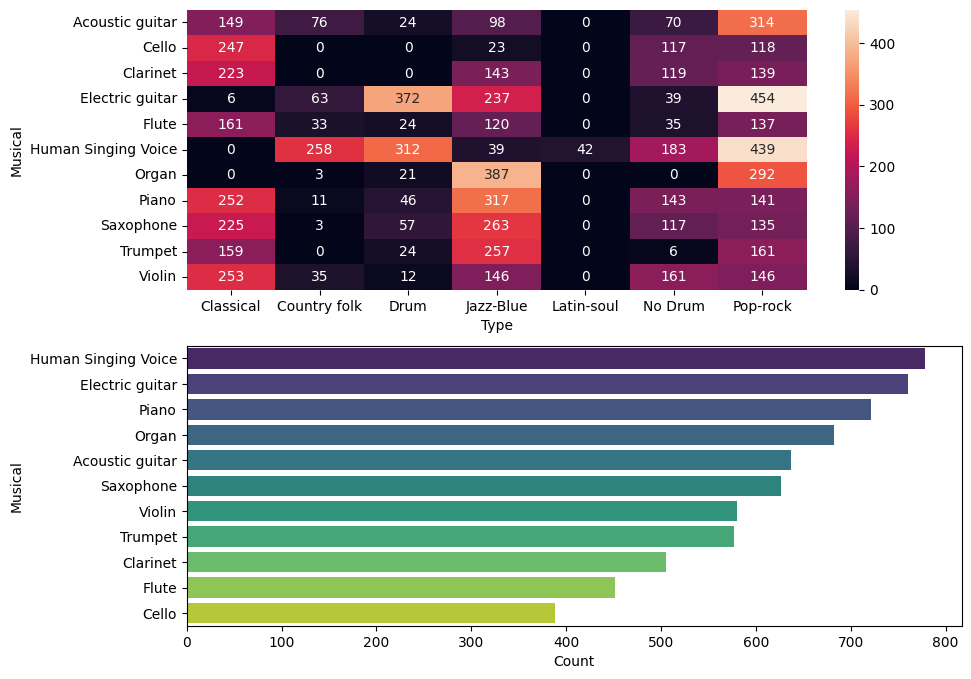

In [33]:
label_counts = defaultdict(int)
training_data = os.path.abspath('./TrainingData')
musical_counts = defaultdict(int)

data = []
for _, _, files in os.walk(training_data):
    for file in files:
        label = utils.extract_anno(file)
        try:
            data.append({'Musical': label[0], 'Type': label[2]})
            label_key = (label[0], label[2])
            label_counts[label_key] += 1
        except:
            pass
        data.append({'Musical': label[0], 'Type': label[1]})
        label_key = (label[0], label[1])
        label_counts[label_key] += 1
        musical_counts[label[0]] += 1

data_for_df = []
for label_key, count in label_counts.items():
    musical, type_ = label_key
    data_for_df.append({'Musical': musical, 'Type': type_, 'Count': count})

# Create DataFrame
df = pd.DataFrame(data_for_df)
musical_counts_df = pd.DataFrame(musical_counts.items(), columns=['Musical', 'Count'])
musical_counts_df = musical_counts_df.sort_values('Count', ascending=False)

# Create pivot table
pivot_table = df.pivot_table(index='Musical', columns='Type', values='Count', fill_value=0)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

sns.heatmap(pivot_table, annot=True, fmt="d", ax=ax1)

sns.barplot(x='Count', y='Musical', data=musical_counts_df, ax=ax2, palette='viridis')
